# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [10]:
# import everything we need
import numpy as np
import pandas as pd
print("set up complete")

set up complete


In [11]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [12]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above

cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('boston.csv')
df = df[cols]
print(df.head())
print(df.shape)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


# Visualize

visualize the correlational data with scatterplot

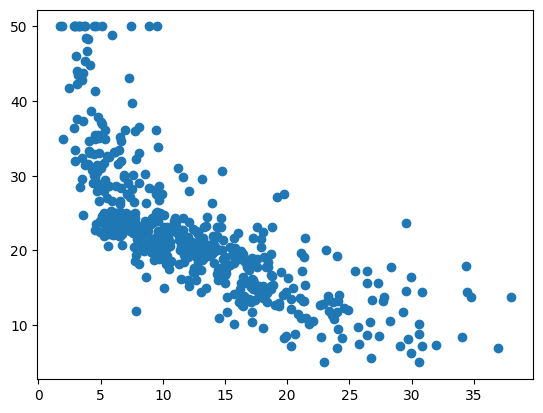

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(df.LSTAT, df.MEDV)

## Model Training

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [15]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
# We need 2D arrays for x_train 
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

In [16]:
medianHomeValue = df.MEDV
percentLowSE = df.LSTAT

x_train, x_test, y_train, y_test = train_test_split(percentLowSE, medianHomeValue, test_size = 0.2, random_state=42)

# print("x-train: \n {} \n y-train: \n {}".format(percentLowSE, medianHomeValue))

linReg = linear_model.LinearRegression()
linReg.fit([x_train], [y_train])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [22]:
x_test = x_test.reshape(-1,1)
y_pred = linReg.predict(x_test) 

print(y_pred)

[26.09951047 31.42509574 17.37173642 29.50169924 18.14496114 23.26757492
 17.12043839 11.48556323 22.39769711 20.986562   17.51671606 18.3092714
 -0.90536293 22.90995849 23.48987703 23.5671995  17.84533656  5.2417736
 31.96635304 17.31374457 28.46751118 27.88759264 12.99335144 25.490596
 19.66241466 17.30407926 26.04151861 16.75315664 18.14496114 21.2088641
 20.63861087 27.87792733 21.8467745  24.98799993 14.23051099 19.57542688
 30.94183029 25.36494698 20.6676068  27.54930682 14.40448655 27.55897213
 32.05334082 22.18506031 26.32181257 18.29960609 17.10110777 28.34186216
 19.09216143 30.02362593 22.01108475 30.40057298 16.74349134 27.4236578
 31.78271217 24.61105288 18.80220216 31.61840192 25.53892254 16.99478937
 25.65490625 30.18793618 31.20279363 23.53820358 29.53069517 12.51975129
 18.28994078 28.34186216 30.66153632 16.46319737 21.16053756 27.35600064
 11.84317966 29.4533727  24.91067746  5.27076953 22.9196238  31.15446708
 14.46247841 11.6692041  26.34114319  9.32053401 25.89653

# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [ ]:
from sklearn.metrics import r2_score

# we can see the coefficient and intercept our model finds
m_coeff = linReg.coef_
c_intercept = linReg.intercept_
print (m_coeff)
print(c_intercept)
print('r2_score: ',r2_score(y_test, y_pred))



[-0.9665309]
34.83694982031851
r2_score:  0.5429180422970384


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

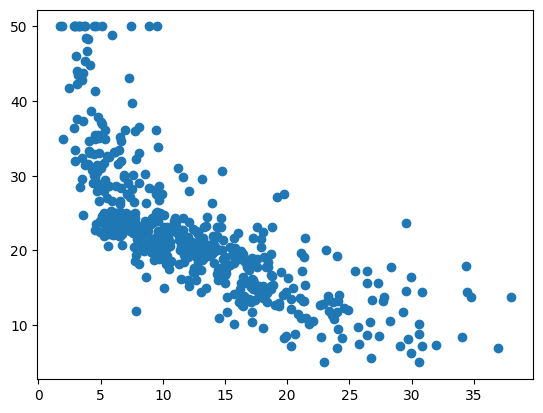

In [18]:
linReg = linear_model.LinearRegression()
x_train = x_train.values.reshape(-1,1)
linReg.fit(x_train, y_train)


y_pred = linReg.predict(x_train)

plt.scatter(df.LSTAT, df.MEDV)

Plot the regression line (blue) vs the actual value (red)

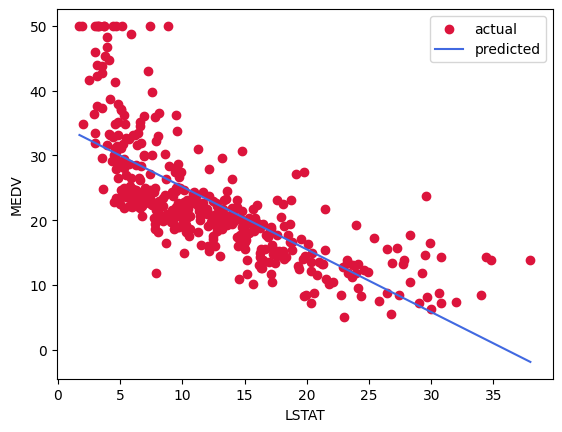

In [21]:
# We want to plot the regression line(blue) vs the actual value(red)

# reshape to (n_samples, 1) because x_* are numpy arrays now
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

y_pred = linReg.predict(x_train)

# plot y_pred vs x_test
x_vals = x_train.flatten()
order = x_vals.argsort()

plt.scatter(x_vals, y_train, color='crimson', label='actual')
plt.plot(x_vals[order], y_pred[order], color='royalblue', label='predicted')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()
